# Greenhouse gas ecosystem fluxes in Prairie Pothole Region wetlands

Research Computing: Final Project

## Research Question
1. Will soil saturation or air temperature influence GHG concentration?
2. Does the GHG fluxes have seasonal characteristics?

## Motivation
This data includes soil properties and greenhouse gas fluxes of Prairie Pothole Region (PPR). The PPR is one of the largest wetland ecosystems in the world, encompassing approximately 770,000 square kilometers of the north-central U.S. and south-central Canada, with the U.S. portion including parts of Iowa, Minnesota, South Dakota, North Dakota, and Montana. 
The dataset includes the data about soil properties and greenhouse gas fluxes of Prairie Pothole Region (PPR) wetland catchments. And this project mainly focus on the factors that will influence the GHG fluxes in this region and its seasonal characteristics. 

![Location of PPR region](https://www.sciencebase.gov/catalog/file/get/59a86e39e4b0421949a84627?f=__disk__4d%2Fd8%2Fc9%2F4dd8c9003c0ef50cc61333a5dcad02a14013fb40)

In [1]:
!pip install seaborn
!pip install statsmodels

In [2]:
# Importing Packages
import pandas as pd 
import numpy as np
import time
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
%matplotlib inline

### 1.Download the datafiles 
Load the GHG data and relevant research data from the USGS website using pd.read_csv function

In [3]:
url1="https://www.sciencebase.gov/catalog/file/get/59a86e39e4b0421949a84627?f=__disk__14%2Fdb%2F74%2F14db744ee5fb1cf3c83a2857c2a2f329f3d78226&allowOpen=true"
df1 = pd.read_csv(url1)
df1

,WETLAND_ID,DATE,LAB_ID,TYPE,CHAMBER_ID,AIR_TEMP_C,SOIL_MOISTURE_PERCENT,SW_TEMP_C,WATER_DEPTH_CM,G_CO2_M2_HR,...,WFPS,SNOW_DEPTH_CM,VEG_HEIGHT,VC1,VC2,VC3,PHASE1,PHASE2,PHASE3,NPWRC_STUDY
0,BECK 5,10JUL2012,13016.0,1,1,31.4,57.1,-9999.0,52.0,0.131963,...,100.000000,-9999.0,-9999.0,50.0,50.0,-9999.0,FL,OW,NaN,PTD_2012
1,BECK 5,10JUL2012,13017.0,1,2,31.4,59.3,-9999.0,37.0,0.168077,...,100.000000,-9999.0,-9999.0,50.0,50.0,-9999.0,FL,OW,NaN,PTD_2012
2,BECK 5,10JUL2012,13019.0,1,4,31.4,62.0,-9999.0,11.0,0.319785,...,100.000000,-9999.0,-9999.0,50.0,50.0,-9999.0,FL,OW,NaN,PTD_2012
3,BECK 5,10JUL2012,13020.0,1,5,31.4,48.5,-9999.0,0.0,1.167695,...,92.595792,-9999.0,-9999.0,100.0,-9999.0,-9999.0,NE,NaN,NaN,PTD_2012
4,BECK 5,10JUL2012,13021.0,1,6,31.4,25.8,-9999.0,0.0,1.377816,...,56.393071,-9999.0,-9999.0,100.0,-9999.0,-9999.0,DV,NaN,NaN,PTD_2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52334,"UNIT 3, N",17JUN2013,21212.0,1,1,22.0,40.7,20.5,60.0,0.030621,...,-9999.000000,-9999.0,-9999.0,100.0,-9999.0,-9999.0,NaN,NaN,NaN,NWR_2010
52335,"UNIT 3, N",10JUL2013,22384.0,1,1,24.1,39.6,25.4,42.0,0.073354,...,-9999.000000,-9999.0,-9999.0,100.0,-9999.0,-9999.0,NaN,NaN,NaN,NWR_2010
52336,"UNIT 3, N",20AUG2013,24049.0,1,1,32.7,38.1,29.0,43.0,0.004529,...,-9999.000000,-9999.0,-9999.0,100.0,-9999.0,-9999.0,NaN,NaN,NaN,NWR_2010
52337,"UNIT 3, N",17SEP2013,25419.0,1,1,22.0,37.4,19.1,44.0,-0.022180,...,-9999.000000,-9999.0,-9999.0,100.0,-9999.0,-9999.0,NaN,NaN,NaN,NWR_2010


In [4]:
GHG = df1[["WETLAND_ID", "DATE","SOIL_MOISTURE_PERCENT", "AIR_TEMP_C","G_CO2_M2_HR","G_CH4_M2_HR","MG_N2O_M2_HR","WATER_DEPTH_CM"]]
GHG.head()

,WETLAND_ID,DATE,SOIL_MOISTURE_PERCENT,AIR_TEMP_C,G_CO2_M2_HR,G_CH4_M2_HR,MG_N2O_M2_HR,WATER_DEPTH_CM
0,BECK 5,10JUL2012,57.1,31.4,0.131963,0.117745,0.000149,52.0
1,BECK 5,10JUL2012,59.3,31.4,0.168077,0.135718,-0.001199,37.0
2,BECK 5,10JUL2012,62.0,31.4,0.319785,0.011101,0.001187,11.0
3,BECK 5,10JUL2012,48.5,31.4,1.167695,0.000345,0.046121,0.0
4,BECK 5,10JUL2012,25.8,31.4,1.377816,-0.000019,0.006827,0.0


In [5]:
GHG.WETLAND_ID.value_counts()

P4                  1094
P6                  1083
P1                  1081
T3                  1057
T7                  1056
                    ... 
GRS09                  8
MARSH, MIDDLE          5
UNIT 2, SW             3
UNIT 2, SOUTH          1
UNIT 1, A DIKE E       1
Name: WETLAND_ID, Length: 199, dtype: int64

###  2.Select two specific areas as the research locations
Use P4 and P6 as the research locations in this project because we have most datasets of these two lacations and some of the locations have few records which means these records may not be suitable for the following researches.

In [6]:
GHG = GHG[(GHG["WETLAND_ID"]=="P4") | (GHG["WETLAND_ID"]=="P6")]
GHG.head()

,WETLAND_ID,DATE,SOIL_MOISTURE_PERCENT,AIR_TEMP_C,G_CO2_M2_HR,G_CH4_M2_HR,MG_N2O_M2_HR,WATER_DEPTH_CM
41849,P4,21MAY2009,53.6,15.8,0.029616,0.000040,-0.002568,121.0
41850,P4,21MAY2009,49.3,15.8,0.028142,0.000021,-0.002931,93.0
41851,P4,21MAY2009,46.1,15.8,0.042194,0.000037,-0.002085,53.0
41852,P4,21MAY2009,42.3,15.8,0.043712,0.000013,0.000489,26.0
41853,P4,21MAY2009,37.6,15.8,0.321894,-0.000058,-0.005699,0.0


### 2.Data analyzation
a. Change the format of time.
Add four columns: "year","month","day" and "date" which can help do the following researches more conveniently.

In [7]:
GHG["year"] = GHG["DATE"].map(lambda x: time.strptime(x, '%d%b%Y').tm_year)
GHG["month"] = GHG["DATE"].map(lambda x:time.strptime(x, '%d%b%Y').tm_mon)
GHG["day"] = GHG["DATE"].map(lambda x:time.strptime(x, '%d%b%Y').tm_mday)
GHG["yday"] = GHG["DATE"].map(lambda x:time.strptime(x, '%d%b%Y').tm_yday)
GHG["date"] = GHG["DATE"].map(lambda x:datetime.date(time.strptime(x, "%d%b%Y").tm_year, 
                                                     time.strptime(x, "%d%b%Y").tm_mon, 
                                                     time.strptime(x, "%d%b%Y").tm_mday))

In [8]:
GHG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177 entries, 41849 to 44025
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WETLAND_ID             2177 non-null   object 
 1   DATE                   2177 non-null   object 
 2   SOIL_MOISTURE_PERCENT  2177 non-null   float64
 3   AIR_TEMP_C             2177 non-null   float64
 4   G_CO2_M2_HR            2177 non-null   float64
 5   G_CH4_M2_HR            2177 non-null   float64
 6   MG_N2O_M2_HR           2177 non-null   float64
 7   WATER_DEPTH_CM         2177 non-null   float64
 8   year                   2177 non-null   int64  
 9   month                  2177 non-null   int64  
 10  day                    2177 non-null   int64  
 11  yday                   2177 non-null   int64  
 12  date                   2177 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 238.1+ KB


b. Continue to do the data analyzation. 
Drop the meaningless values of the dataset."-9999" in this case.

In [9]:
GHG = GHG[GHG["SOIL_MOISTURE_PERCENT"]!=-9999]
GHG = GHG[GHG["G_CO2_M2_HR"]!=-9999]
GHG = GHG[GHG["G_CH4_M2_HR"]!=-9999]
GHG = GHG[GHG["MG_N2O_M2_HR"]!=-9999]
GHG = GHG[GHG["WATER_DEPTH_CM"]!=-9999]
GHG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 41849 to 44025
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WETLAND_ID             1837 non-null   object 
 1   DATE                   1837 non-null   object 
 2   SOIL_MOISTURE_PERCENT  1837 non-null   float64
 3   AIR_TEMP_C             1837 non-null   float64
 4   G_CO2_M2_HR            1837 non-null   float64
 5   G_CH4_M2_HR            1837 non-null   float64
 6   MG_N2O_M2_HR           1837 non-null   float64
 7   WATER_DEPTH_CM         1837 non-null   float64
 8   year                   1837 non-null   int64  
 9   month                  1837 non-null   int64  
 10  day                    1837 non-null   int64  
 11  yday                   1837 non-null   int64  
 12  date                   1837 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 200.9+ KB


In [10]:
GHG.head()

,WETLAND_ID,DATE,SOIL_MOISTURE_PERCENT,AIR_TEMP_C,G_CO2_M2_HR,G_CH4_M2_HR,MG_N2O_M2_HR,WATER_DEPTH_CM,year,month,day,yday,date
41849,P4,21MAY2009,53.6,15.8,0.029616,0.000040,-0.002568,121.0,2009,5,21,141,2009-05-21
41850,P4,21MAY2009,49.3,15.8,0.028142,0.000021,-0.002931,93.0,2009,5,21,141,2009-05-21
41851,P4,21MAY2009,46.1,15.8,0.042194,0.000037,-0.002085,53.0,2009,5,21,141,2009-05-21
41852,P4,21MAY2009,42.3,15.8,0.043712,0.000013,0.000489,26.0,2009,5,21,141,2009-05-21
41853,P4,21MAY2009,37.6,15.8,0.321894,-0.000058,-0.005699,0.0,2009,5,21,141,2009-05-21


In [11]:
P4 = GHG[GHG["WETLAND_ID"]=="P4"]
P6 = GHG[GHG["WETLAND_ID"]=="P6"]

## First hypothesis: Whether soil moisture or air temperature will influence GHG fluxes

### 1.Plot the Soil moisture vs. GHG figures in P4 and P6
Set soil moisture as the x axis and CO2, CH4 and N2O as the three releatively y axises to find the relationship between GHG concentration and soil moisture.

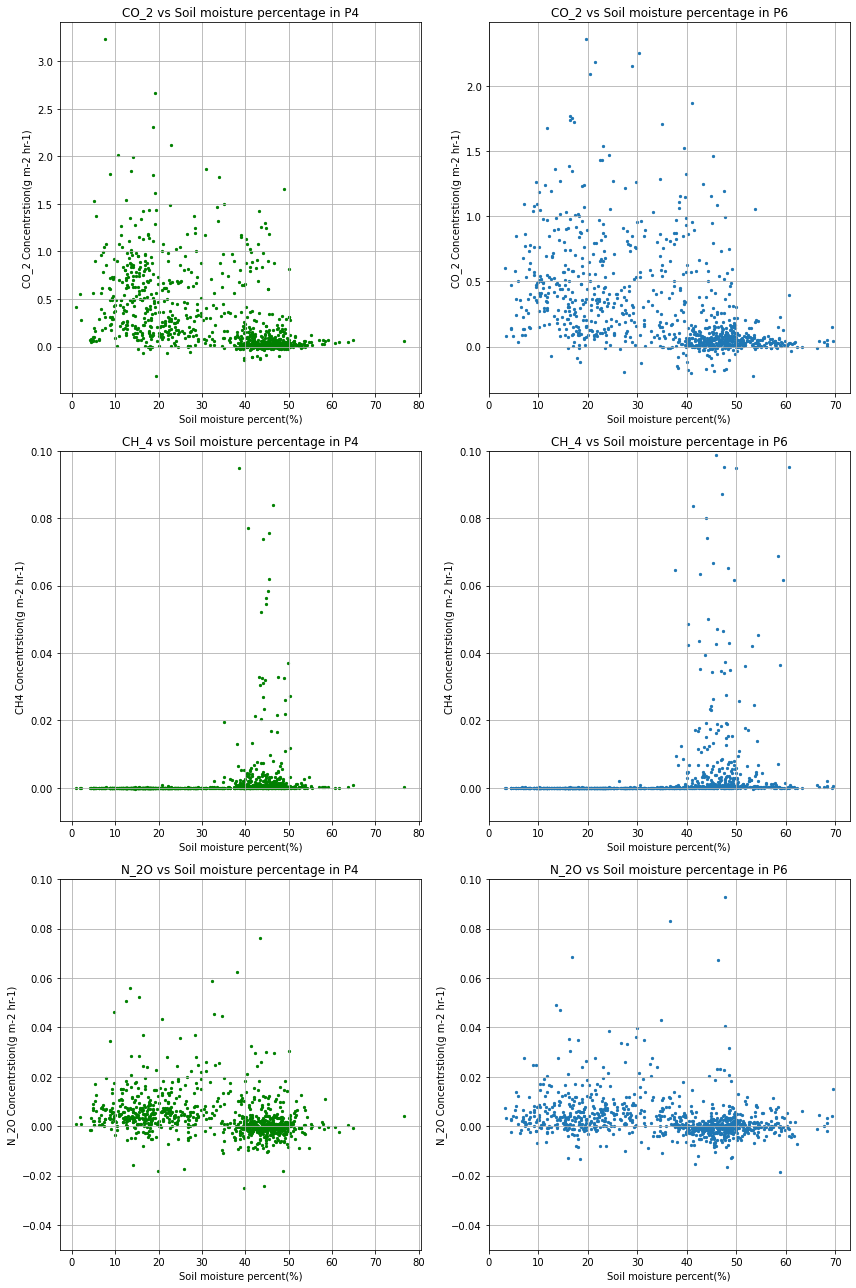

In [12]:
fig = plt.figure(figsize=(12, 18))
ax1 = fig.add_subplot(3,2,1)
ax1.scatter(P4.SOIL_MOISTURE_PERCENT,P4.G_CO2_M2_HR, s = 5, c='green')
ax1.set_xlabel('Soil moisture percent(%)')
ax1.set_ylabel('CO_2 Concentrstion(g m-2 hr-1)')
ax1.set_title('CO_2 vs Soil moisture percentage in P4')
ax1.grid()

ax3 = fig.add_subplot(3,2,3)
ax3.scatter(P4.SOIL_MOISTURE_PERCENT,P4.G_CH4_M2_HR, s = 5,c='green')
ax3.set_xlabel('Soil moisture percent(%)')
ax3.set_ylabel('CH4 Concentrstion(g m-2 hr-1)')
ax3.set_ylim(-0.01,0.1)
ax3.set_title('CH_4 vs Soil moisture percentage in P4')
ax3.grid()

ax5 = fig.add_subplot(3,2,5)
ax5.scatter(P4.SOIL_MOISTURE_PERCENT,P4.MG_N2O_M2_HR, s = 5, c='green')
ax5.set_xlabel('Soil moisture percent(%)')
ax5.set_ylabel('N_2O Concentrstion(g m-2 hr-1)')
ax5.set_ylim(-0.05,0.1)
ax5.set_title('N_2O vs Soil moisture percentage in P4')
ax5.grid()

ax2 = fig.add_subplot(3,2,2)
ax2.scatter(P6.SOIL_MOISTURE_PERCENT,P6.G_CO2_M2_HR, s = 5)
ax2.set_xlabel('Soil moisture percent(%)')
ax2.set_ylabel('CO_2 Concentrstion(g m-2 hr-1)')
ax2.set_title('CO_2 vs Soil moisture percentage in P6')
ax2.grid()

ax4 = fig.add_subplot(3,2,4)
ax4.scatter(P6.SOIL_MOISTURE_PERCENT,P6.G_CH4_M2_HR, s = 5)
ax4.set_xlabel('Soil moisture percent(%)')
ax4.set_ylabel('CH4 Concentrstion(g m-2 hr-1)')
ax4.set_ylim(-0.01,0.1)
ax4.set_title('CH_4 vs Soil moisture percentage in P6')
ax4.grid()

ax6 = fig.add_subplot(3,2,6)
ax6.scatter(P6.SOIL_MOISTURE_PERCENT,P6.MG_N2O_M2_HR, s = 5)
ax6.set_xlabel('Soil moisture percent(%)')
ax6.set_ylabel('N_2O Concentrstion(g m-2 hr-1)')
ax6.set_ylim(-0.05,0.1)
ax6.set_title('N_2O vs Soil moisture percentage in P6')
ax6.grid()
fig.tight_layout()

### 2.Plot the Air temperature vs. GHG figures in P4 and P6
Set air temperature as the x axis and CO2, CH4 and N2O as the three releatively y axises to look for the relationships between GHG concentration and air temperature.

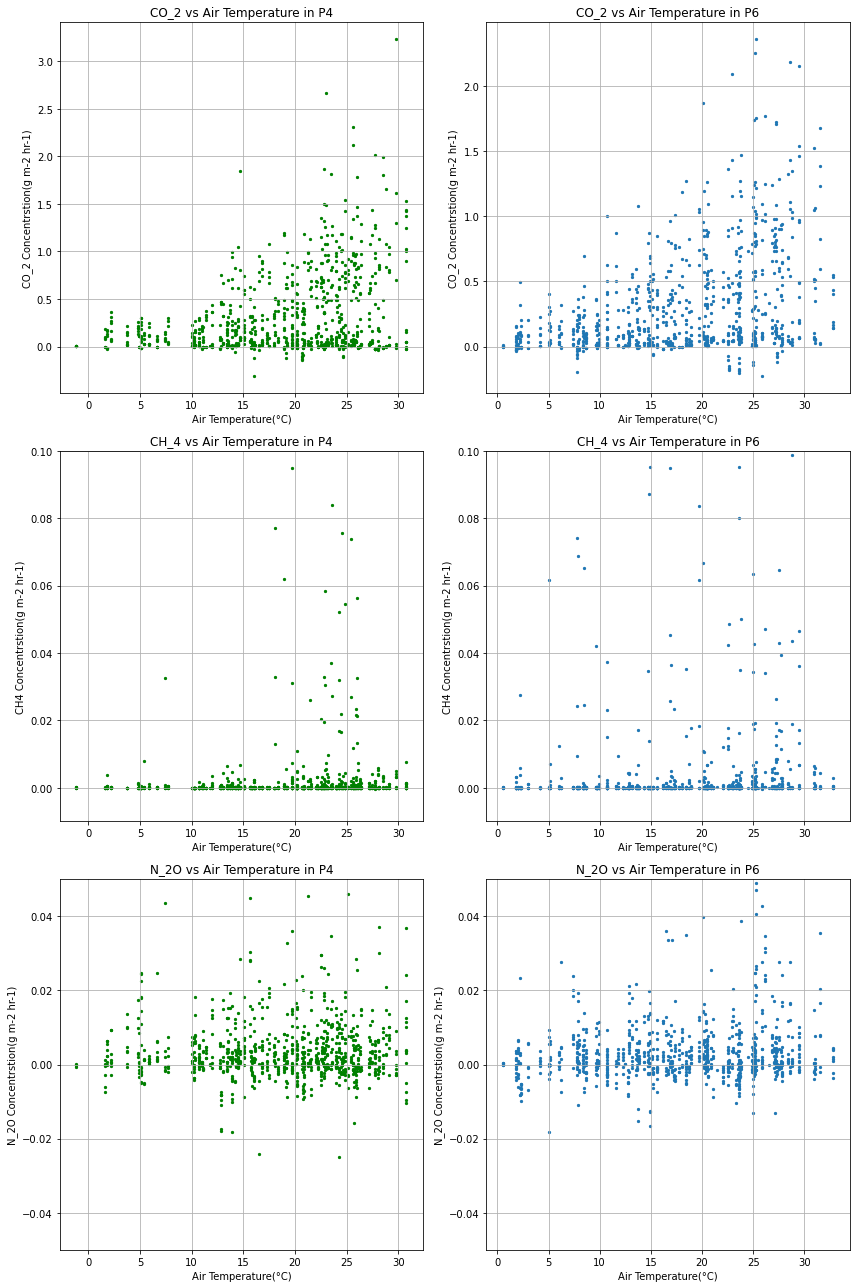

In [13]:
fig = plt.figure(figsize=(12,18))
ax1 = fig.add_subplot(3,2,1)
ax1.scatter(P4.AIR_TEMP_C,P4.G_CO2_M2_HR, s = 5,c='green')
ax1.set_xlabel('Air Temperature(°C)')
ax1.set_ylabel('CO_2 Concentrstion(g m-2 hr-1)')
ax1.set_title('CO_2 vs Air Temperature in P4')
ax1.grid()

ax3 = fig.add_subplot(3,2,3)
ax3.scatter(P4.AIR_TEMP_C,P4.G_CH4_M2_HR, s = 5,c='green')
ax3.set_xlabel('Air Temperature(°C)')
ax3.set_ylabel('CH4 Concentrstion(g m-2 hr-1)')
ax3.set_title('CH_4 vs Air Temperature in P4')
ax3.set_ylim(-0.01, 0.1)
ax3.grid()

ax5 = fig.add_subplot(3,2,5)
ax5.scatter(P4.AIR_TEMP_C,P4.MG_N2O_M2_HR, s = 5,c='green')
ax5.set_xlabel('Air Temperature(°C)')
ax5.set_ylabel('N_2O Concentrstion(g m-2 hr-1)')
ax5.set_title('N_2O vs Air Temperature in P4')
ax5.set_ylim(-0.05, 0.05)
ax5.grid()

ax2 = fig.add_subplot(3,2,2)
ax2.scatter(P6.AIR_TEMP_C,P6.G_CO2_M2_HR, s = 5)
ax2.set_xlabel('Air Temperature(°C)')
ax2.set_ylabel('CO_2 Concentrstion(g m-2 hr-1)')
ax2.set_title('CO_2 vs Air Temperature in P6')
ax2.grid()

ax4 = fig.add_subplot(3,2,4)
ax4.scatter(P6.AIR_TEMP_C,P6.G_CH4_M2_HR, s = 5)
ax4.set_xlabel('Air Temperature(°C)')
ax4.set_ylabel('CH4 Concentrstion(g m-2 hr-1)')
ax4.set_title('CH_4 vs Air Temperature in P6')
ax4.set_ylim(-0.01, 0.1)
ax4.grid()

ax6 = fig.add_subplot(3,2,6)
ax6.scatter(P6.AIR_TEMP_C,P6.MG_N2O_M2_HR, s = 5)
ax6.set_xlabel('Air Temperature(°C)')
ax6.set_ylabel('N_2O Concentrstion(g m-2 hr-1)')
ax6.set_title('N_2O vs Air Temperature in P6')
ax6.set_ylim(-0.05, 0.05)
ax6.grid()

fig.tight_layout()

As we can see from these figures, CO2 concentration have high relevances with Air temperature

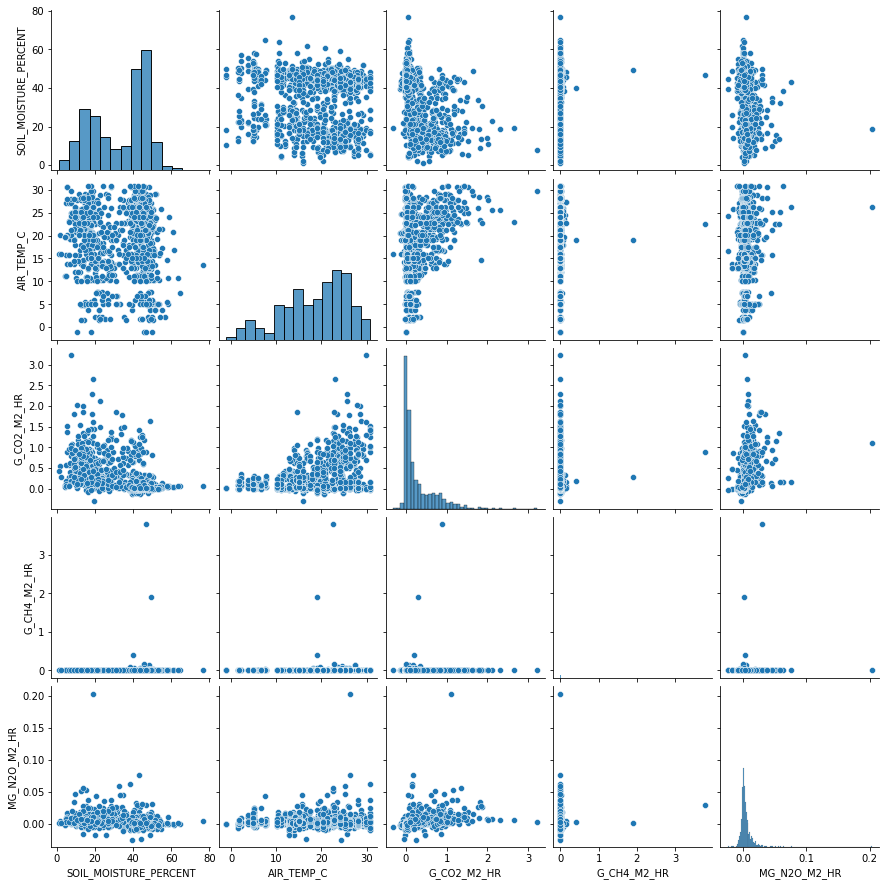

In [14]:
GHG_temp = GHG[GHG["WETLAND_ID"]=="P4"][["SOIL_MOISTURE_PERCENT", "AIR_TEMP_C", "G_CO2_M2_HR", "G_CH4_M2_HR", "MG_N2O_M2_HR"]]

sns.pairplot(GHG_temp)
plt.show()

In [15]:
temp = GHG[GHG["WETLAND_ID"]=="P4"][["SOIL_MOISTURE_PERCENT","AIR_TEMP_C","G_CO2_M2_HR", "G_CH4_M2_HR", "MG_N2O_M2_HR"]]
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 41849 to 42942
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SOIL_MOISTURE_PERCENT  921 non-null    float64
 1   AIR_TEMP_C             921 non-null    float64
 2   G_CO2_M2_HR            921 non-null    float64
 3   G_CH4_M2_HR            921 non-null    float64
 4   MG_N2O_M2_HR           921 non-null    float64
dtypes: float64(5)
memory usage: 43.2 KB


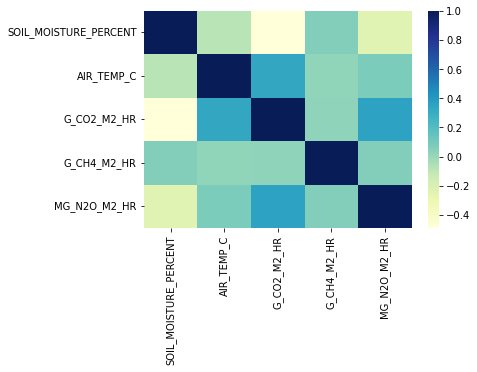

In [16]:
sns.heatmap(temp.corr(),annot=False, cmap="YlGnBu")
plt.show()

## More research 
### Soil moisture vs. GHG fluxes
Do regression analysis to further find out the relationship between soil moisture and GHG fluxes more clearly. In this case, take P4 as an example.

In [17]:
soil = GHG[GHG["WETLAND_ID"]=="P4"][["SOIL_MOISTURE_PERCENT", "G_CO2_M2_HR", "G_CH4_M2_HR", "MG_N2O_M2_HR"]]
soil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 41849 to 42942
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SOIL_MOISTURE_PERCENT  921 non-null    float64
 1   G_CO2_M2_HR            921 non-null    float64
 2   G_CH4_M2_HR            921 non-null    float64
 3   MG_N2O_M2_HR           921 non-null    float64
dtypes: float64(4)
memory usage: 36.0 KB


### Soil moisture vs. CO2 

In [18]:
variables = ["SOIL_MOISTURE_PERCENT", "G_CH4_M2_HR", "MG_N2O_M2_HR"]
X = sm.add_constant(soil[variables])
Y = soil["G_CO2_M2_HR"]

fit = sm.OLS(Y,X).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            G_CO2_M2_HR   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     132.2
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           3.49e-71
Time:                        22:09:42   Log-Likelihood:                -327.12
No. Observations:                 921   AIC:                             662.2
Df Residuals:                     917   BIC:                             681.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.6636      0.030     21.764      0.000       0.604       0.723
SOIL_MOISTURE_PERCENT    -0.0122      0.001    -15.144      0.000      -0.014      -0.011
G_CH4_M2_HR               0.1253      0.082      1.535      0.125      -0.035       0.285
MG_N2O_M2_HR              9.2479      1.064      8.688      0.000       7.159      11.337
==============================================================================
Omnibus:                      459.132   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3523.507
Skew:                           2.146   Prob(JB):                         0.00
Kurtosis:                      11.567   Cond. No.                     3.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Soil moisture vs. CH4

In [19]:
variables = ["SOIL_MOISTURE_PERCENT", "G_CO2_M2_HR", "MG_N2O_M2_HR"]
X = sm.add_constant(soil[variables])
Y = soil["G_CH4_M2_HR"]

fit = sm.OLS(Y,X).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            G_CH4_M2_HR   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.559
Date:                Thu, 09 Dec 2021   Prob (F-statistic):             0.0140
Time:                        22:09:42   Log-Likelihood:                 507.47
No. Observations:                 921   AIC:                            -1007.
Df Residuals:                     917   BIC:                            -987.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0332      0.015     -2.193      0.029      -0.063      -0.003
SOIL_MOISTURE_PERCENT     0.0010      0.000      2.720      0.007       0.000       0.002
G_CO2_M2_HR               0.0205      0.013      1.535      0.125      -0.006       0.047
MG_N2O_M2_HR              0.7855      0.447      1.758      0.079      -0.091       1.662
==============================================================================
Omnibus:                     2236.249   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13180503.151
Skew:                          23.335   Prob(JB):                         0.00
Kurtosis:                     587.198   Cond. No.                     3.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Soil moisture vs. N2O

In [20]:
variables = ["SOIL_MOISTURE_PERCENT", "G_CH4_M2_HR", "G_CO2_M2_HR"]
X = sm.add_constant(soil[variables])
Y = soil["MG_N2O_M2_HR"]

fit = sm.OLS(Y,X).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           MG_N2O_M2_HR   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     48.43
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           4.69e-29
Time:                        22:09:42   Log-Likelihood:                 2908.0
No. Observations:                 921   AIC:                            -5808.
Df Residuals:                     917   BIC:                            -5789.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0041      0.001      3.660      0.000       0.002       0.006
SOIL_MOISTURE_PERCENT -7.471e-05   2.68e-05     -2.786      0.005      -0.000   -2.21e-05
G_CH4_M2_HR               0.0043      0.002      1.758      0.079      -0.000       0.009
G_CO2_M2_HR               0.0082      0.001      8.688      0.000       0.006       0.010
==============================================================================
Omnibus:                     1380.302   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           725811.769
Skew:                           8.399   Prob(JB):                         0.00
Kurtosis:                     139.497   Cond. No.                         261.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
temp = GHG[GHG["WETLAND_ID"]=="P4"][["AIR_TEMP_C", "G_CO2_M2_HR", "G_CH4_M2_HR", "MG_N2O_M2_HR"]]
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 41849 to 42942
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AIR_TEMP_C    921 non-null    float64
 1   G_CO2_M2_HR   921 non-null    float64
 2   G_CH4_M2_HR   921 non-null    float64
 3   MG_N2O_M2_HR  921 non-null    float64
dtypes: float64(4)
memory usage: 36.0 KB


### Air Temperature vs. CO2

In [22]:
variables = ["AIR_TEMP_C", "G_CH4_M2_HR", "MG_N2O_M2_HR"]
X = sm.add_constant(temp[variables])
Y = temp["G_CO2_M2_HR"]

fit = sm.OLS(Y,X).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            G_CO2_M2_HR   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     85.14
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           1.34e-48
Time:                        22:09:42   Log-Likelihood:                -379.51
No. Observations:                 921   AIC:                             767.0
Df Residuals:                     917   BIC:                             786.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0805      0.034     -2.391      0.017      -0.147      -0.014
AIR_TEMP_C       0.0173      0.002     10.299      0.000       0.014       0.021
G_CH4_M2_HR      0.0129      0.086      0.150      0.881      -0.156       0.182
MG_N2O_M2_HR    12.4345      1.094     11.366      0.000      10.287      14.582
==============================================================================
Omnibus:                      367.057   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2533.712
Skew:                           1.660   Prob(JB):                         0.00
Kurtosis:                      10.417   Cond. No.                     1.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Air Temperature vs. CH4

In [23]:
variables = ["AIR_TEMP_C", "G_CO2_M2_HR", "MG_N2O_M2_HR"]
X = sm.add_constant(temp[variables])
Y = temp["G_CH4_M2_HR"]

fit = sm.OLS(Y,X).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            G_CH4_M2_HR   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.202
Date:                Thu, 09 Dec 2021   Prob (F-statistic):              0.308
Time:                        22:09:42   Log-Likelihood:                 503.95
No. Observations:                 921   AIC:                            -999.9
Df Residuals:                     917   BIC:                            -980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0019      0.013     -0.150      0.881      -0.027       0.023
AIR_TEMP_C       0.0004      0.001      0.595      0.552      -0.001       0.002
G_CO2_M2_HR      0.0019      0.013      0.150      0.881      -0.023       0.027
MG_N2O_M2_HR     0.6921      0.447      1.548      0.122      -0.186       1.570
==============================================================================
Omnibus:                     2244.667   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13492335.500
Skew:                          23.548   Prob(JB):                         0.00
Kurtosis:                     594.078   Cond. No.                     1.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Air Temperature vs. N2O

In [24]:
variables = ["AIR_TEMP_C", "G_CO2_M2_HR", "G_CH4_M2_HR"]
X = sm.add_constant(temp[variables])
Y = temp["MG_N2O_M2_HR"]

fit = sm.OLS(Y,X).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           MG_N2O_M2_HR   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     46.22
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           8.04e-28
Time:                        22:09:42   Log-Likelihood:                 2905.1
No. Observations:                 921   AIC:                            -5802.
Df Residuals:                     917   BIC:                            -5783.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0024      0.001      2.532      0.012       0.001       0.004
AIR_TEMP_C  -7.115e-05   5.02e-05     -1.417      0.157      -0.000    2.74e-05
G_CO2_M2_HR     0.0099      0.001     11.366      0.000       0.008       0.012
G_CH4_M2_HR     0.0038      0.002      1.548      0.122      -0.001       0.009
==============================================================================
Omnibus:                     1376.528   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           716422.498
Skew:                           8.356   Prob(JB):                         0.00
Kurtosis:                     138.609   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Result
The GHG fluxes have a linear relationship with soil moisture. However, only CO2 has the linear relationship with air temperature.

## Research 2: Whether the GHG fluxes have the seasonal characteristics.

In [25]:
P4_month = P4.groupby("month").mean()
P4_seasonal= P4_month[["G_CO2_M2_HR","G_CH4_M2_HR","MG_N2O_M2_HR"]]
P4_seasonal

,G_CO2_M2_HR,G_CH4_M2_HR,MG_N2O_M2_HR
month,,,
3,0.077187,0.002799,0.004807
4,0.097048,0.000212,0.003282
5,0.196482,0.000388,0.003808
6,0.408590,0.022302,0.003734
7,0.470888,0.029692,0.007077
8,0.457212,0.004177,0.005145
9,0.257337,0.003787,0.002008
10,0.133964,0.000251,0.003384
11,0.055182,0.000319,0.000011


In [26]:
P6_month = P6.groupby("month").mean()
P6_seasonal= P6_month[["G_CO2_M2_HR","G_CH4_M2_HR","MG_N2O_M2_HR"]]
P6_seasonal

,G_CO2_M2_HR,G_CH4_M2_HR,MG_N2O_M2_HR
month,,,
3,0.121573,0.000065,0.005491
4,0.068350,0.000526,0.001748
5,0.191210,0.003334,0.002535
6,0.413297,0.054521,0.003580
7,0.470988,0.023591,0.004247
8,0.476801,0.007409,0.002842
9,0.243725,0.008179,0.002467
10,0.124086,0.002235,0.003669
11,0.070422,0.004185,-0.000470


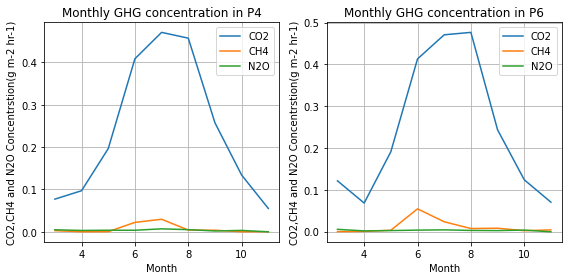

In [27]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(P4_seasonal,label=["CO2","CH4","N2O"])
ax1.set_xlabel('Month')
ax1.set_ylabel('CO2,CH4 and N2O Concentrstion(g m-2 hr-1)')
ax1.set_title('Monthly GHG concentration in P4')
plt.legend()
plt.grid()

ax2 = fig.add_subplot(1,2,2)
ax2.plot(P6_seasonal,label=["CO2","CH4","N2O"])
ax2.set_xlabel('Month')
ax2.set_ylabel('CO2,CH4 and N2O Concentrstion(g m-2 hr-1)')
ax2.set_title('Monthly GHG concentration in P6')
plt.grid()

plt.legend()
fig.tight_layout()

In [28]:
P4_yday_mean = P4.groupby(["yday"]).mean()
P4_yday_std = P4.groupby(["yday"]).std()
P4_days = list(P4_yday_std.index)

P6_yday_mean = P6.groupby(["yday"]).mean()
P6_yday_std = P6.groupby(["yday"]).std()
P6_days = list(P6_yday_std.index)

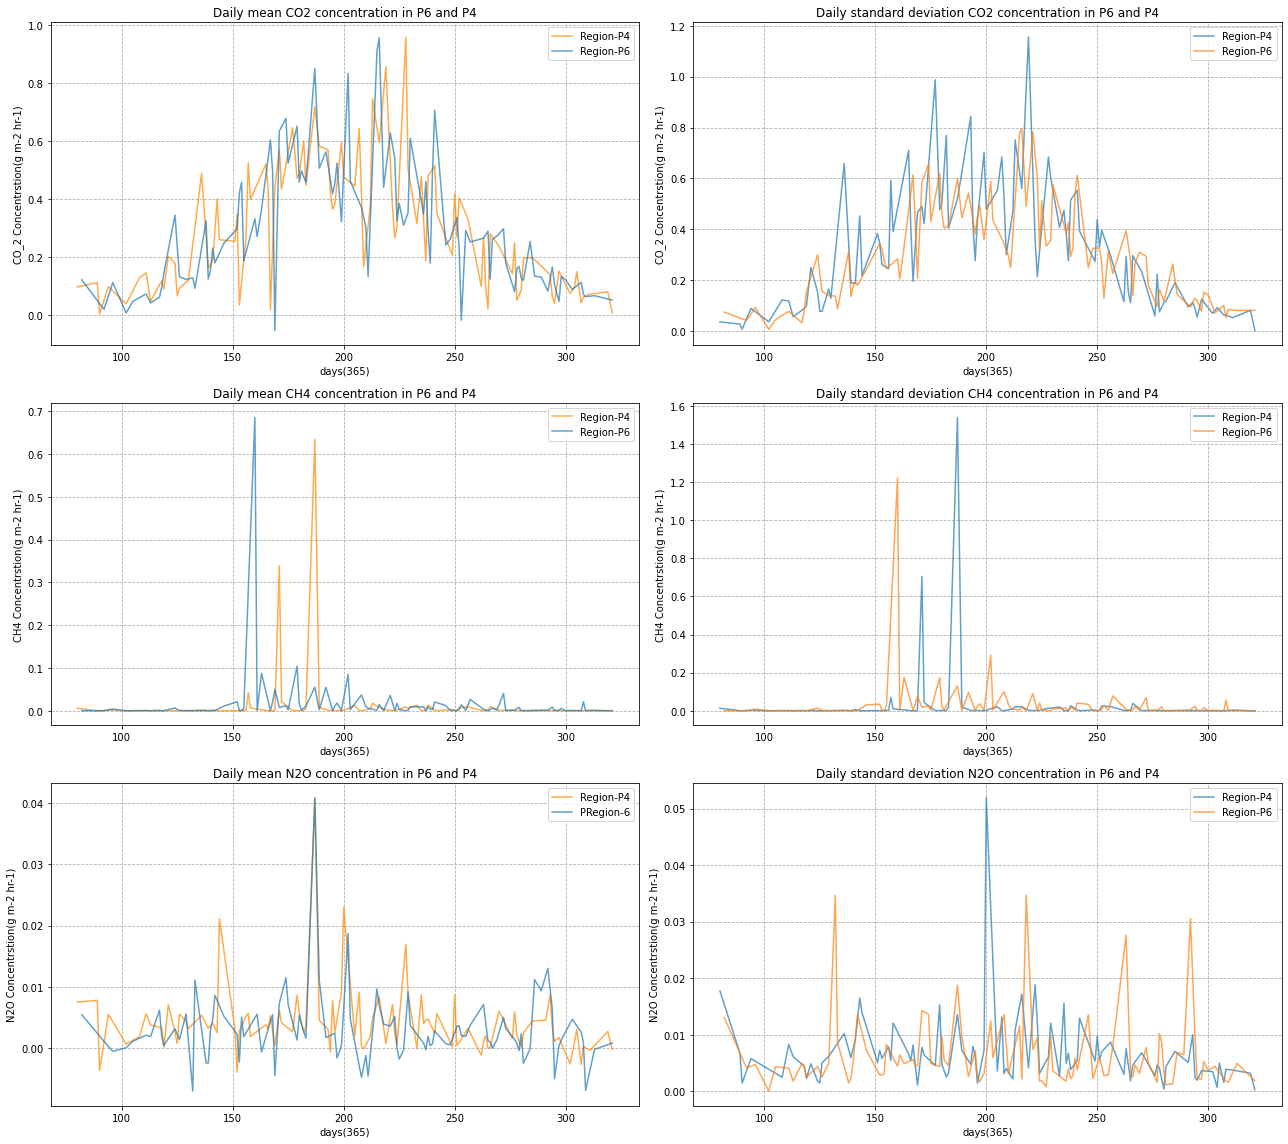

In [29]:
fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(3,2,1)
ax1.plot(P4_yday_mean.index, P4_yday_mean["G_CO2_M2_HR"], '-', c="#FF8800", alpha=0.7, label="Region-P4")
ax1.plot(P6_yday_mean.index, P6_yday_mean["G_CO2_M2_HR"], '-', alpha=0.7, label="Region-P6")
ax1.set_xlabel('days(365)')
ax1.set_ylabel('CO_2 Concentrstion(g m-2 hr-1)')
ax1.set_title('Daily mean CO2 concentration in P6 and P4')
plt.grid(linestyle = '--')
plt.legend()

ax3 = fig.add_subplot(3,2,3)
ax3.plot(P4_yday_mean.index, P4_yday_mean["G_CH4_M2_HR"], '-', c="#FF8800", alpha=0.7, label="Region-P4")
ax3.plot(P6_yday_mean.index, P6_yday_mean["G_CH4_M2_HR"], '-', alpha=0.7, label="Region-P6")
ax3.set_xlabel('days(365)')
ax3.set_ylabel('CH4 Concentrstion(g m-2 hr-1)')
ax3.set_title('Daily mean CH4 concentration in P6 and P4')
plt.grid(linestyle = '--')
plt.legend()

ax5 = fig.add_subplot(3,2,5)
ax5.plot(P4_yday_mean.index, P4_yday_mean["MG_N2O_M2_HR"], '-', c="#FF8800", alpha=0.7, label="Region-P4")
ax5.plot(P6_yday_mean.index, P6_yday_mean["MG_N2O_M2_HR"], '-', alpha=0.7, label="PRegion-6")
ax5.set_xlabel('days(365)')
ax5.set_ylabel('N2O Concentrstion(g m-2 hr-1)')
ax5.set_title('Daily mean N2O concentration in P6 and P4')
plt.grid(linestyle = '--')
plt.legend()

ax2 = fig.add_subplot(3,2,2)
ax2.plot(P4_yday_std.index, P4_yday_std["G_CO2_M2_HR"], '-', alpha=0.7, label="Region-P4")
ax2.plot(P6_yday_std.index, P6_yday_std["G_CO2_M2_HR"], '-', alpha=0.7, label="Region-P6")
ax2.set_xlabel('days(365)')
ax2.set_ylabel('CO_2 Concentrstion(g m-2 hr-1)')
ax2.set_title('Daily standard deviation CO2 concentration in P6 and P4')
plt.grid(linestyle = '--')
plt.legend()

ax4 = fig.add_subplot(3,2,4)
ax4.plot(P4_yday_std.index, P4_yday_std["G_CH4_M2_HR"], '-', alpha=0.7, label="Region-P4")
ax4.plot(P6_yday_std.index, P6_yday_std["G_CH4_M2_HR"], '-', alpha=0.7, label="Region-P6")
ax4.set_xlabel('days(365)')
ax4.set_ylabel('CH4 Concentrstion(g m-2 hr-1)')
ax4.set_title('Daily standard deviation CH4 concentration in P6 and P4')
plt.grid(linestyle = '--')
plt.legend()

ax6 = fig.add_subplot(3,2,6)
ax6.plot(P4_yday_std.index, P4_yday_std["MG_N2O_M2_HR"], '-', alpha=0.7, label="Region-P4")
ax6.plot(P6_yday_std.index, P6_yday_std["MG_N2O_M2_HR"], '-', alpha=0.7, label="Region-P6")
ax6.set_xlabel('days(365)')
ax6.set_ylabel('N2O Concentrstion(g m-2 hr-1)')
ax6.set_title('Daily standard deviation N2O concentration in P6 and P4')
plt.grid(linestyle = '--')
plt.legend()
fig.tight_layout()

In [30]:
P4_y_mean = P4.groupby(["year"]).mean()
P4_y_std = P4.groupby(["year"]).std()

P6_y_mean = P6.groupby(["year"]).mean()
P6_y_std = P6.groupby(["year"]).std()

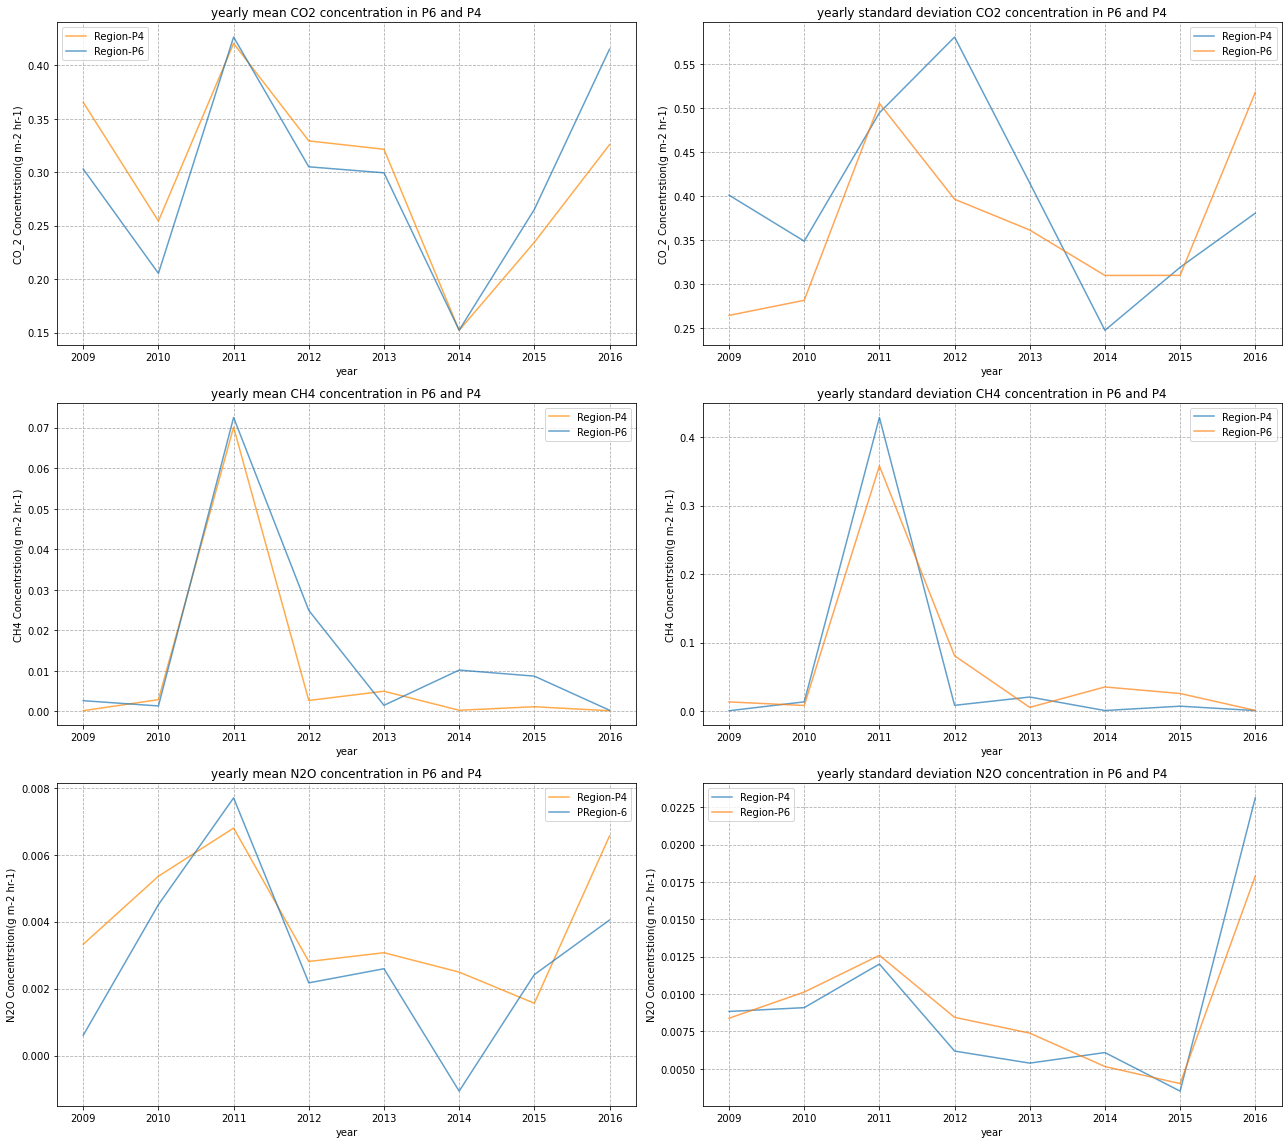

In [31]:
fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(3,2,1)
ax1.plot(P4_y_mean.index, P4_y_mean["G_CO2_M2_HR"], '-', c="#FF8800", alpha=0.7, label="Region-P4")
ax1.plot(P6_y_mean.index, P6_y_mean["G_CO2_M2_HR"], '-', alpha=0.7, label="Region-P6")
ax1.set_xlabel('year')
ax1.set_ylabel('CO_2 Concentrstion(g m-2 hr-1)')
ax1.set_title('yearly mean CO2 concentration in P6 and P4')
plt.grid(linestyle = '--')
plt.legend()

ax3 = fig.add_subplot(3,2,3)
ax3.plot(P4_y_mean.index, P4_y_mean["G_CH4_M2_HR"], '-', c="#FF8800", alpha=0.7, label="Region-P4")
ax3.plot(P6_y_mean.index, P6_y_mean["G_CH4_M2_HR"], '-', alpha=0.7, label="Region-P6")
ax3.set_xlabel('year')
ax3.set_ylabel('CH4 Concentrstion(g m-2 hr-1)')
ax3.set_title('yearly mean CH4 concentration in P6 and P4')
plt.grid(linestyle = '--')
plt.legend()

ax5 = fig.add_subplot(3,2,5)
ax5.plot(P4_y_mean.index, P4_y_mean["MG_N2O_M2_HR"], '-', c="#FF8800", alpha=0.7, label="Region-P4")
ax5.plot(P6_y_mean.index, P6_y_mean["MG_N2O_M2_HR"], '-', alpha=0.7, label="PRegion-6")
ax5.set_xlabel('year')
ax5.set_ylabel('N2O Concentrstion(g m-2 hr-1)')
ax5.set_title('yearly mean N2O concentration in P6 and P4')
plt.grid(linestyle = '--')
plt.legend()

ax2 = fig.add_subplot(3,2,2)
ax2.plot(P4_y_std.index, P4_y_std["G_CO2_M2_HR"], '-', alpha=0.7, label="Region-P4")
ax2.plot(P6_y_std.index, P6_y_std["G_CO2_M2_HR"], '-', alpha=0.7, label="Region-P6")
ax2.set_xlabel('year')
ax2.set_ylabel('CO_2 Concentrstion(g m-2 hr-1)')
ax2.set_title('yearly standard deviation CO2 concentration in P6 and P4')
plt.grid(linestyle = '--')
plt.legend()

ax4 = fig.add_subplot(3,2,4)
ax4.plot(P4_y_std.index, P4_y_std["G_CH4_M2_HR"], '-', alpha=0.7, label="Region-P4")
ax4.plot(P6_y_std.index, P6_y_std["G_CH4_M2_HR"], '-', alpha=0.7, label="Region-P6")
ax4.set_xlabel('year')
ax4.set_ylabel('CH4 Concentrstion(g m-2 hr-1)')
ax4.set_title('yearly standard deviation CH4 concentration in P6 and P4')
plt.grid(linestyle = '--')
plt.legend()

ax6 = fig.add_subplot(3,2,6)
ax6.plot(P4_y_std.index, P4_y_std["MG_N2O_M2_HR"], '-', alpha=0.7, label="Region-P4")
ax6.plot(P6_y_std.index, P6_y_std["MG_N2O_M2_HR"], '-', alpha=0.7, label="Region-P6")
ax6.set_xlabel('year')
ax6.set_ylabel('N2O Concentrstion(g m-2 hr-1)')
ax6.set_title('yearly standard deviation N2O concentration in P6 and P4')
plt.grid(linestyle = '--')
plt.legend()
fig.tight_layout()

### Results
The results of this study reveal a typical seasonal trend of CO2 flux, which corresponds to the trend of CH4 and N2O. The CO2 seasonal flux usually increases before July and then gradually decreases. CH4 fluxes always gets peak during mid-summer. Furthermore, soil moisture and air temperature do will influence the GHG fluxes in the PPR region.

## Spatial variation

In [32]:
location = df1[["WETLAND_ID", "DATE", "G_CO2_M2_HR","G_CH4_M2_HR","MG_N2O_M2_HR","WATER_DEPTH_CM"]]
location.head()

,WETLAND_ID,DATE,G_CO2_M2_HR,G_CH4_M2_HR,MG_N2O_M2_HR,WATER_DEPTH_CM
0,BECK 5,10JUL2012,0.131963,0.117745,0.000149,52.0
1,BECK 5,10JUL2012,0.168077,0.135718,-0.001199,37.0
2,BECK 5,10JUL2012,0.319785,0.011101,0.001187,11.0
3,BECK 5,10JUL2012,1.167695,0.000345,0.046121,0.0
4,BECK 5,10JUL2012,1.377816,-0.000019,0.006827,0.0


In [33]:
location = location[["WETLAND_ID","DATE" ,"G_CO2_M2_HR","G_CH4_M2_HR","MG_N2O_M2_HR"]]

In [34]:
location = location[location["G_CO2_M2_HR"]!=-9999]
location = location[location["G_CH4_M2_HR"]!=-9999]
location = location[location["MG_N2O_M2_HR"]!=-9999]
location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51679 entries, 0 to 52338
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WETLAND_ID    51679 non-null  object 
 1   DATE          51679 non-null  object 
 2   G_CO2_M2_HR   51679 non-null  float64
 3   G_CH4_M2_HR   51679 non-null  float64
 4   MG_N2O_M2_HR  51679 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.4+ MB


In [35]:
location_variable=location.groupby("WETLAND_ID").mean()
location_variable

,G_CO2_M2_HR,G_CH4_M2_HR,MG_N2O_M2_HR
WETLAND_ID,,,
BECK 5,0.524350,0.069003,0.036476
BECK 6,0.463706,0.090846,0.052117
C1,0.720885,0.013660,0.022807
C2,0.733187,0.004336,0.040464
C3,0.635290,0.006443,0.018966
...,...,...,...
"UNIT 2, SOUTH",0.037740,-0.000008,-0.000174
"UNIT 2, SW",0.044204,0.000021,0.000340
"UNIT 3, C DIKE",0.017650,0.001086,0.001587


In [36]:
location_variable = location_variable.sample(n=20)

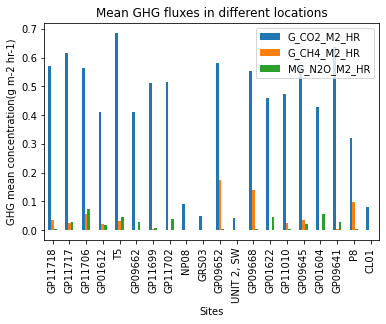

In [37]:
ax1=location_variable.plot(kind='bar')
ax1.set_ylabel("GHG mean concentration(g m-2 hr-1)")
ax1.set_xlabel("Sites")
ax1.set_title("Mean GHG fluxes in different locations")
plt.show()
